# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [17]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,\n \n\n\n\n\n\nALI WONG: BABY COBRA (2016) - F...,Ali Wong
amy,\n \n\n\n\n\n\nAMY SCHUMER: THE LEATHER SPECIA...,Amy Schumer
anthony,\n \n\n\n\n\n\nAnthony Jeselnik: Thoughts And ...,Anthony Jeselnik
bill,\n \n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL T...,Bill Burr
bo,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Bo Burnham
dave,\n \n\n\n\n\n\nDave Chappelle: The Age of Spin...,Dave Chappelle
eddie,\n \n\n\n\n\n\nEddie Murphy: Delirious (1983) ...,Eddie Murphy
george,\n \n\n\n\n\n\nGeorge Carlin: It's Bad For Ya ...,George Carlin
hasan,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Hasan Minhaj
jim,\n \n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - Fu...,Jim Jefferies


In [18]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,\n \n\n\n\n\n\nALI WONG: BABY COBRA (2016) - F...,Ali Wong,0.069700,0.488356
amy,\n \n\n\n\n\n\nAMY SCHUMER: THE LEATHER SPECIA...,Amy Schumer,0.128087,0.550967
anthony,\n \n\n\n\n\n\nAnthony Jeselnik: Thoughts And ...,Anthony Jeselnik,0.059126,0.558522
bill,\n \n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL T...,Bill Burr,0.016439,0.540101
bo,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Bo Burnham,0.043056,0.573611
dave,\n \n\n\n\n\n\nDave Chappelle: The Age of Spin...,Dave Chappelle,-0.000239,0.515960
eddie,\n \n\n\n\n\n\nEddie Murphy: Delirious (1983) ...,Eddie Murphy,-0.115832,0.556648
george,\n \n\n\n\n\n\nGeorge Carlin: It's Bad For Ya ...,George Carlin,0.043476,0.502650
hasan,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Hasan Minhaj,0.043056,0.573611
jim,\n \n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - Fu...,Jim Jefferies,0.045637,0.523353


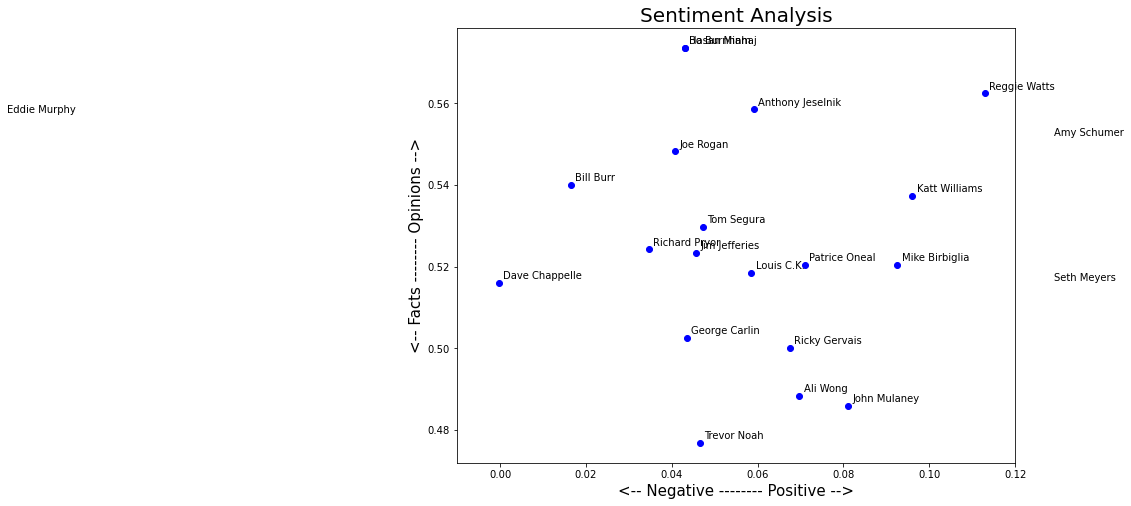

In [19]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [20]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [21]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,\n \n\n\n\n\n\nALI WONG: BABY COBRA (2016) - F...,Ali Wong,0.069700,0.488356
amy,\n \n\n\n\n\n\nAMY SCHUMER: THE LEATHER SPECIA...,Amy Schumer,0.128087,0.550967
anthony,\n \n\n\n\n\n\nAnthony Jeselnik: Thoughts And ...,Anthony Jeselnik,0.059126,0.558522
bill,\n \n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL T...,Bill Burr,0.016439,0.540101
bo,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Bo Burnham,0.043056,0.573611
dave,\n \n\n\n\n\n\nDave Chappelle: The Age of Spin...,Dave Chappelle,-0.000239,0.515960
eddie,\n \n\n\n\n\n\nEddie Murphy: Delirious (1983) ...,Eddie Murphy,-0.115832,0.556648
george,\n \n\n\n\n\n\nGeorge Carlin: It's Bad For Ya ...,George Carlin,0.043476,0.502650
hasan,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Hasan Minhaj,0.043056,0.573611
jim,\n \n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - Fu...,Jim Jefferies,0.045637,0.523353


In [22]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["\n \n\n\n\n\n\nALI WONG: BABY COBRA (2016) - Full Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n\n\r\n\t\tSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\nPAULINE KAEL\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n Menu\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY KUBRICK\nPAULINE KAEL\n\n\nTV SERIES\n\nTV SHOW TRANSCRIPTS\n\n\nCOMEDY\n\nSTAND-UP COMEDY TRANSCRIPTS\nGEORGE CARLIN\nDAVE CHAPPELLE\n\n\nINTERVIEWS\n\nPLAYBOY INTERVIEWS\n\n\nMUSIC\nHISTORY\nBOOKS\n \n\n\n\n\n\n\n\n Search\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\nMOVIES\n\nMOVIE REVIEWS\nMOVIE TRANSCRIPTS\nSTANLEY 

In [23]:
# The list has 10 elements, one for each transcript
len(list_pieces)

22

In [24]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [25]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.12993722943722946,
  0.03676475519785379,
  0.09967400192400191,
  0.09202657429091854,
  -0.02883345004668534,
  0.10622484376878913,
  0.07339941402441401,
  0.06281523672687465,
  0.037204469507101094,
  0.11179401993355481],
 [0.1672849348072562,
  0.17946946388352644,
  0.13336309523809523,
  0.07855848861283644,
  0.10292587868480729,
  0.15696002886002883,
  0.09618746993746993,
  0.11341738183843449,
  0.127776969199383,
  0.10406746031746031],
 [0.24993879901774635,
  -0.06152988577687374,
  -0.06748176748176751,
  0.056092171717171735,
  0.10818720660492812,
  0.1557465698143664,
  0.06355194805194804,
  -0.030018472906403946,
  0.08040504577389822,
  0.13819176319176316],
 [0.005058020683020677,
  -0.015382842466175831,
  0.01968257437007437,
  0.012931636120888443,
  -0.01980738627934889,
  0.08088059673554962,
  -0.006830997949419018,
  -0.03442741090146752,
  0.08821632071632073,
  0.04129887727448703],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.45, 0.0, 0.0, 0.0, -0.03125],
 [-0.0

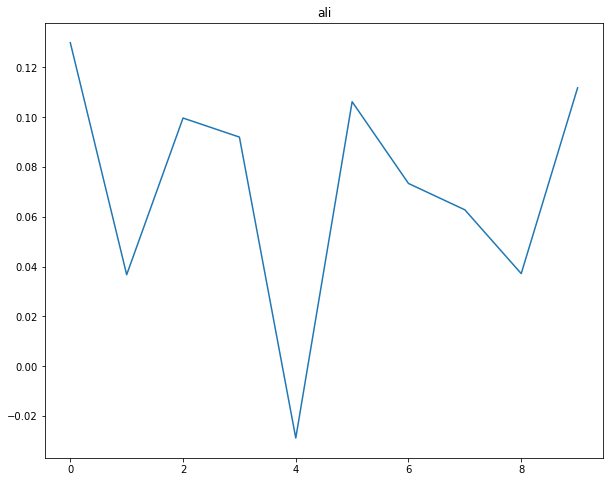

In [26]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

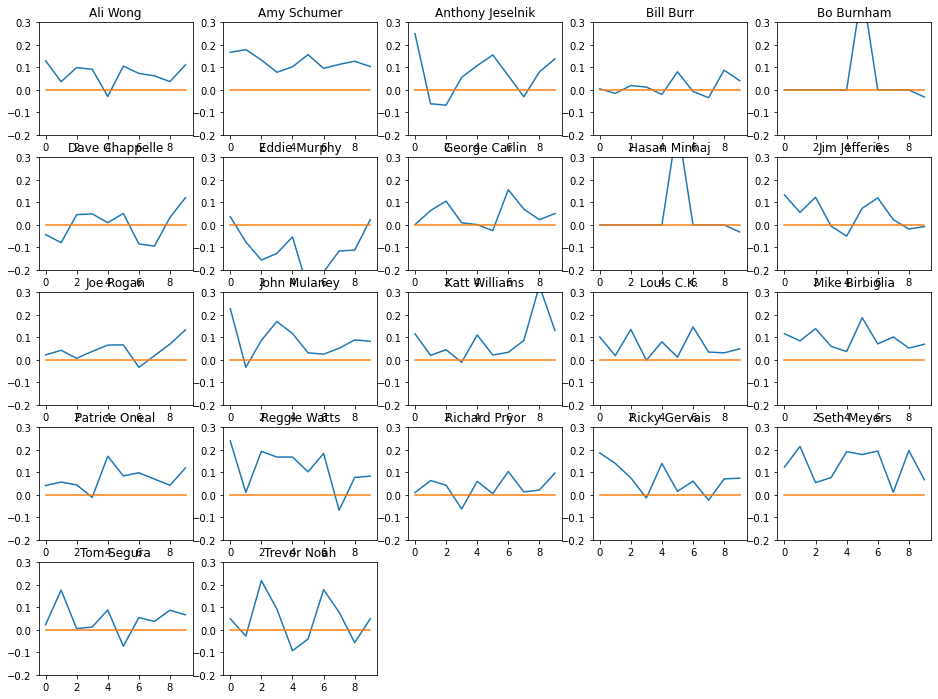

In [27]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(5, 5, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [32]:
comedian_df = data.groupby('full_name').agg({'polarity': 'mean', 'subjectivity': 'mean'})

# Create polarity_class column
comedian_df['polarity_class'] = np.where(comedian_df['polarity']>0, 'positive', np.where(comedian_df['polarity']==0, 'neutral', 'negative'))

# Create subjectivity_class column
comedian_df['subjectivity_class'] = np.where(comedian_df['subjectivity']>0.5, 'subjective', 'objective')

print(comedian_df)



                  polarity  subjectivity polarity_class subjectivity_class
full_name                                                                 
Ali Wong          0.069700      0.488356       positive          objective
Amy Schumer       0.128087      0.550967       positive         subjective
Anthony Jeselnik  0.059126      0.558522       positive         subjective
Bill Burr         0.016439      0.540101       positive         subjective
Bo Burnham        0.043056      0.573611       positive         subjective
Dave Chappelle   -0.000239      0.515960       negative         subjective
Eddie Murphy     -0.115832      0.556648       negative         subjective
George Carlin     0.043476      0.502650       positive         subjective
Hasan Minhaj      0.043056      0.573611       positive         subjective
Jim Jefferies     0.045637      0.523353       positive         subjective
Joe Rogan         0.040759      0.548242       positive         subjective
John Mulaney      0.08106

In [33]:
import numpy as np
import math

def split_text(text, *args):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''
    
    n = args[0] if args else 10

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list


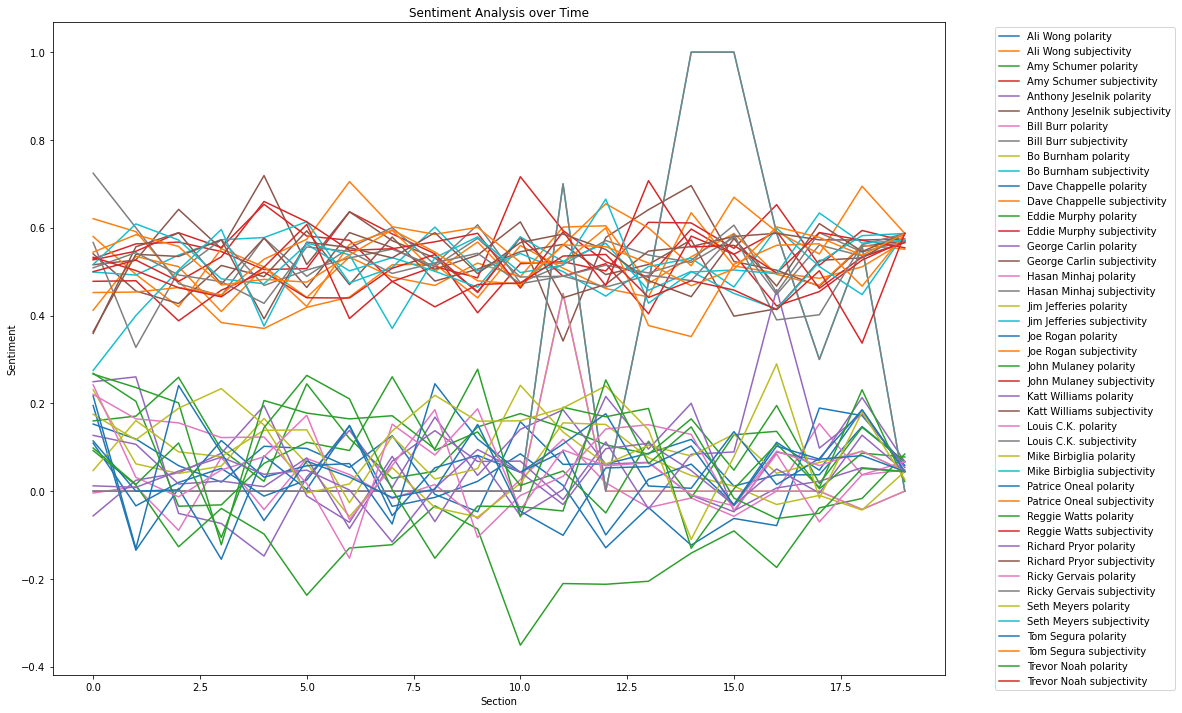

In [41]:
import matplotlib.pyplot as plt

# Plot the polarity and subjectivity over time for each comedian
for index, comedian in data.iterrows():
    # Split the transcript into sections
    split = split_text(comedian['transcript'], 20)
    
    # Calculate polarity and subjectivity for each section
    polarity_section = []
    subjectivity_section = []
    for s in split:
        tb = TextBlob(s)
        polarity_section.append(tb.sentiment.polarity)
        subjectivity_section.append(tb.sentiment.subjectivity)
    
    # Plot the polarity and subjectivity over time
    plt.plot(range(len(polarity_section)), polarity_section, label=comedian['full_name'] + ' polarity')
    plt.plot(range(len(subjectivity_section)), subjectivity_section, label=comedian['full_name'] + ' subjectivity')
    
plt.title('Sentiment Analysis over Time')
plt.xlabel('Section')
plt.ylabel('Sentiment')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


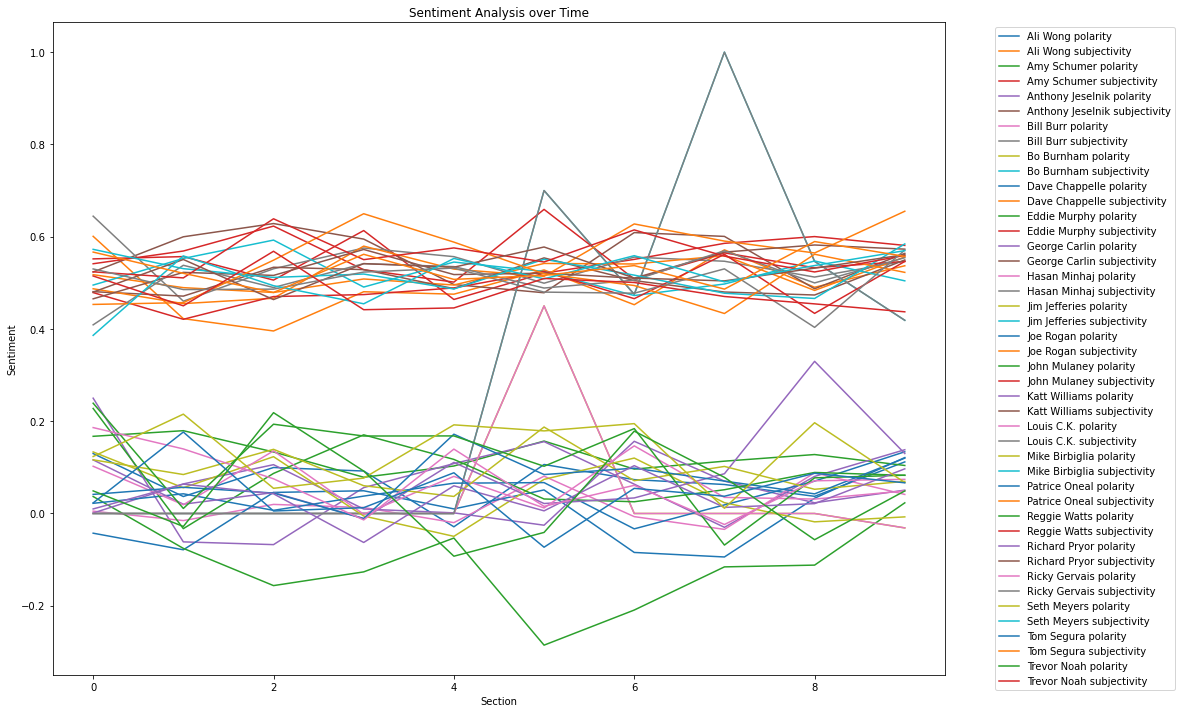

In [42]:
import matplotlib.pyplot as plt

# Plot the polarity and subjectivity over time for each comedian
for index, comedian in data.iterrows():
    # Split the transcript into sections
    split = split_text(comedian['transcript'], 10)
    
    # Calculate polarity and subjectivity for each section
    polarity_section = []
    subjectivity_section = []
    for s in split:
        tb = TextBlob(s)
        polarity_section.append(tb.sentiment.polarity)
        subjectivity_section.append(tb.sentiment.subjectivity)
    
    # Plot the polarity and subjectivity over time
    plt.plot(range(len(polarity_section)), polarity_section, label=comedian['full_name'] + ' polarity')
    plt.plot(range(len(subjectivity_section)), subjectivity_section, label=comedian['full_name'] + ' subjectivity')
    
plt.title('Sentiment Analysis over Time')
plt.xlabel('Section')
plt.ylabel('Sentiment')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [36]:
data['polarity_mean'] = data['polarity'].apply(lambda x: np.mean(x))
data['subjectivity_mean'] = data['subjectivity'].apply(lambda x: np.mean(x))

# Classify each comedian based on polarity and subjectivity
for index, comedian in data.iterrows():
    polarity = comedian['polarity_mean']
    subjectivity = comedian['subjectivity_mean']
    if polarity > 0 and subjectivity > 0.5:
        data.at[index, 'classification'] = 'Positive and Subjective'
    elif polarity > 0 and subjectivity <= 0.5:
        data.at[index, 'classification'] = 'Positive and Objective'
    elif polarity < 0 and subjectivity > 0.5:
        data.at[index, 'classification'] = 'Negative and Subjective'
    elif polarity < 0 and subjectivity <= 0.5:
        data.at[index, 'classification'] = 'Negative and Objective'
    else:
        data.at[index, 'classification'] = 'Neutral'


In [37]:
data

,transcript,full_name,polarity,subjectivity,polarity_mean,subjectivity_mean,polarity_class,subjectivity_class,classification
ali,\n \n\n\n\n\n\nALI WONG: BABY COBRA (2016) - F...,Ali Wong,0.069700,0.488356,0.069700,0.488356,Positive,Objective,Positive and Objective
amy,\n \n\n\n\n\n\nAMY SCHUMER: THE LEATHER SPECIA...,Amy Schumer,0.128087,0.550967,0.128087,0.550967,Positive,Subjective,Positive and Subjective
anthony,\n \n\n\n\n\n\nAnthony Jeselnik: Thoughts And ...,Anthony Jeselnik,0.059126,0.558522,0.059126,0.558522,Positive,Subjective,Positive and Subjective
bill,\n \n\n\n\n\n\nBILL BURR: I'M SORRY YOU FEEL T...,Bill Burr,0.016439,0.540101,0.016439,0.540101,Positive,Subjective,Positive and Subjective
bo,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Bo Burnham,0.043056,0.573611,0.043056,0.573611,Positive,Subjective,Positive and Subjective
dave,\n \n\n\n\n\n\nDave Chappelle: The Age of Spin...,Dave Chappelle,-0.000239,0.515960,-0.000239,0.515960,Positive,Subjective,Negative and Subjective
eddie,\n \n\n\n\n\n\nEddie Murphy: Delirious (1983) ...,Eddie Murphy,-0.115832,0.556648,-0.115832,0.556648,Negative,Subjective,Negative and Subjective
george,\n \n\n\n\n\n\nGeorge Carlin: It's Bad For Ya ...,George Carlin,0.043476,0.502650,0.043476,0.502650,Positive,Subjective,Positive and Subjective
hasan,\n \n\n\n\n\n\nPage Not Found - Scraps from th...,Hasan Minhaj,0.043056,0.573611,0.043056,0.573611,Positive,Subjective,Positive and Subjective
jim,\n \n\n\n\n\n\nJIM JEFFERIES: BARE (2014) - Fu...,Jim Jefferies,0.045637,0.523353,0.045637,0.523353,Positive,Subjective,Positive and Subjective
